<a href="https://colab.research.google.com/github/salahMas/236703-OOP-TESTS/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducrtion to Machine Learning: Assignment #2
## Submission date: 18\06\2024, 23:59.
### Topics:
- Perceptron
- Logistic Regression
- Gradient Descent
- SVM
- Kernels

Submitted by:

 **Student 1 Salah Massalha | 211866413

 **Student 2 Mohammed Azaiza | 206684383

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Logistic regression - Part 1

In this section you will build a classifier on a "toy" problem - Based on two grades, we determine if student passes the course or not.

import libraries and load dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv', header=None)
df.head(3)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


Now, lets preproccess:
- Convert dataset to numpy, make sure classes are {0,1} or {-1,1} (depends of the update rule you choose)
- Split to train & test (80-20, starify, random_state=42)
- Scale using scaler of your choice

<font color='red'>Explain here your scaler choice:

we have used StandardScaler , Logistic regression assume that the data follows a normal distribution. StandardScaler help us in this assumption</font>

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Import scaling library

# Implement here
x = df.drop(columns=2).values  # Features
y = df[2].values  # Labels

u_classes = np.unique(y)

if not np.array_equal(u_classes,[0,1]):
    print("Not all classes 0 or 1")




# Fit the scaler on the training data and transform both training and test data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

#
#
scaler = StandardScaler()


# Fit the scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Implement the function Logistic_Regression_via_GD(P,y,lr):
-	Input: an np array ‘X’ of ‘n’ rows and ‘d’ columns, a label vector ‘y’ of ‘n’ entries and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘X’ and ‘y’. <br/>

The implementation should be fully yours. Don't use library implementation! <br/>
It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)



In [29]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def Logistic_Regression_via_GD(X, y, lr):
    # Implement here
    n , d = X.shape
    weights = np.zeros(d)
    bias = 0
    n_iters = 1000
    for _ in range(n_iters):
        linear_pred = np.dot(X,weights) + bias
        pred = sigmoid(linear_pred)
        dw = (1/n)*np.dot(X.T,(pred-y))
        db = (1/n)*np.sum((pred-y))

        weights = weights - lr*dw
        bias = bias - lr*db

    return weights,bias

The function 'predict' is already implemented for you. It gives a classification for a new sample (x) based on the sign of $w^\top x + b$. <br/>
You may change it if you chose to return {+1,0} instead of {+1,-1}.

In [30]:
def predict(w,b,x):
    y_pred = sigmoid(np.dot(x, w) + b )
    class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
    return class_pred


Call ‘Logistic_Regression_via_GD(X,y,lr)’, where ‘X’ and ‘y’ are the training data and the corresponding labels. <br/>
Run the model on the test data. With good LR you should get accuracy >= 88\%

In [31]:
chosen_lr = 0.001 # Add here.
w, b = Logistic_Regression_via_GD(X_train, y_train, chosen_lr)



preds = predict(w, b, X_test)
accuracy = np.sum(preds == y_test) / len(y_test)
print(f"Test accuracy is {accuracy * 100}%")

Test accuracy is 95.0%


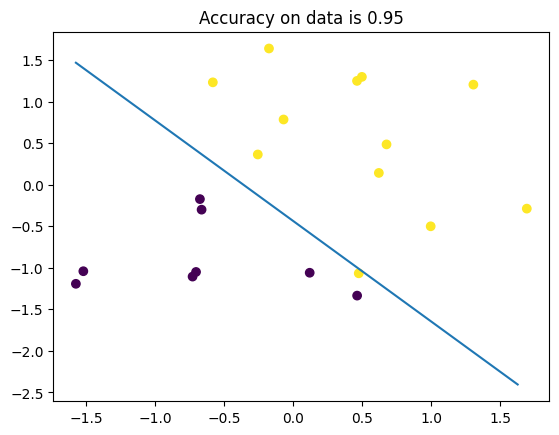

In [32]:
#@title Visualize data (on test)

import matplotlib.pyplot as plt

def plot(data, labels, w, bias):

    plt.scatter(data[:,0], data[:,1], c=labels)

    a, b, c = w[0], w[1], bias

    m = -a / b
    b = -c / b

    x = np.arange(np.min(data[:,0]), np.max(data[:,0]), 0.1)
    y = m * x + b

    plt.plot(x, y)

    # preds = np.sign(np.dot(data, w)+bias)
    preds = predict(w, bias, data)
    acc = np.count_nonzero(labels == preds) / len(labels)
    plt.title(f"Accuracy on data is {acc}")

    plt.show()

plot(X_test, y_test, w, b)

## Question 1 - Logistic regression - Part 2
Now we are going to work on a much realistic problem - based on IMDB review, classify whether its positive or negative review.

In [33]:
# import libraries

import gensim
from gensim.models import Word2Vec
import os

Print first review <br/>
Tip: Click on file -> mount drive. Since the dataset is heavy (60MB), you don't want to upload it over and over each time. Then, you will be able to open it from your drive storage.

In [34]:
df = pd.read_csv('/content/drive/MyDrive/dataset/IMDB Dataset.csv')    # you may change the path according to your drive

print(f"The dataset shape is {df.shape}")

# print the first line
print(df.iloc[0].review)
print(df.iloc[0].sentiment)

The dataset shape is (50000, 2)
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appe

As you can see, the input is a <b>sentence</b>. The proccess of turning words into <u>meaningful</u> continious vectors is called "tokenization" (you will learn more in DL and NLP). In the next section you will load the model and proccess the reviews to obtain continious representation for the data

# New Section

In [35]:
#@title Model loader function

MODEL_PATH = 'wordvec.model'

def load_model(data):
	if os.path.exists(MODEL_PATH):
		return gensim.models.Word2Vec.load(MODEL_PATH)
	else:
		model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1)
		model.save(MODEL_PATH)
		return model

In [36]:
sentences = df['review'].tolist()

# turn sentences into a list. Each sentence is an array of words
tokenized_sentences = [[token for token in row.split()] for row in sentences]

# will ~3 minutes. The model is saved to a LOCAL path.
model = load_model(tokenized_sentences)     # calls to "model loader function" above.

In [37]:
word_vectors = model.wv
print(word_vectors['wow'].shape)
print(word_vectors['wow'])

(100,)
[ 0.09199516  0.0770325   0.26852232 -0.17601015  0.0857103  -0.09635102
  0.19769885  0.62852484 -0.5514069  -0.21473844  0.11514787 -0.33604893
  0.11964504  0.14274701  0.09288466 -0.03371264 -0.12137457 -0.20453809
  0.00730405 -0.30547985 -0.1412701   0.22011986  0.220365   -0.44284755
 -0.18645492  0.25976843 -0.198073    0.05664778 -0.06129076  0.2704302
  0.03454711  0.12764773  0.12105116 -0.32881543  0.03374727  0.37024876
  0.16075724 -0.0973905  -0.2931489  -0.41602048 -0.12274703 -0.10089268
  0.2508741  -0.00152839  0.10316317 -0.09255208 -0.36871713 -0.34312454
  0.15944974  0.03521062  0.38452837 -0.11105287 -0.14565061 -0.15208364
  0.15372859  0.03678416 -0.17548855  0.26508236  0.13931857  0.05145942
 -0.11093901 -0.02775547 -0.22818655  0.07561681  0.12327034  0.13956994
  0.25475615  0.21150404 -0.36688548 -0.04973811 -0.33282724 -0.09219375
  0.13249351  0.10946329  0.2904493   0.21612418  0.04399151 -0.05943146
 -0.14900558 -0.15588827  0.00529428  0.07421

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


As you can see, each word has now 100 features. <br/>
For simplicity, you will represent a sentence by the mean vector of all the words within it. <br/>
Your tasks are: <br/>
- Make sure classes are {0,1} or {-1,1} (depends of the update rule you choose). You can change that row.
- Construct X to be 50000 x 100, where each row represents a sentnce.
- Convert it to numpy.

In [39]:
y = df['sentiment'].replace({'positive': 1, 'negative': 0}).to_numpy()

# Implement here the construction of X
def sentence_to_vector(sentence, model, vector_size):
    words = sentence.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if word_vecs:
        return np.mean(word_vecs, axis=0)
    else:
        return np.zeros(vector_size)

# Create the matrix X
vector_size = 100
X = np.array([sentence_to_vector(sentence, model, vector_size) for sentence in sentences])

Split the data into 20\% test and 80\% train. After that, split the train into smaller train and 20% validation. Use stratify and random state of 42\%

In [41]:
# Implement here




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

X_rtrain, X_val, y_rtrain, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)


Now, scale the data <br/>
Hint: there are many wrong ways to do that scaling (on train validation and test) but only one is correct. Recall What sets are required for validation and for evaluation on test. We discussed this on the second tutorial<br/>
<font color='red'>What scaler did you choose and why?

we have used StandardScaler for the same reasons above,
Because we conduct training and then testing, we must shadow the entire training group, so we first do scaling and fit on all the train set (small train + validiation set) and then transform on the test set.
(when we have a training set and validation set that takes from the training set, we get a small training set and validation set, so we do fit and transform on the small training and transform on the validation. </font>

In [42]:
# Implement here
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# scaler1 = StandardScaler()
# X_train = scaler1.fit_transform(X_train)
X_test = scaler.transform(X_test)


Copy here your logistic solver from before and adjust its implementation for this problem, if required.

In [43]:
# Implement here
def sigmoid(z):
  return 1/(1+np.exp(-z))

def Logistic_Regression_via_GD(X, y, lr):
    # Implement here
    n , d = X.shape
    weights = np.zeros(d)
    bias = 0
    n_iters = 1000
    for _ in range(n_iters):
        linear_pred = np.dot(X,weights) + bias
        pred = sigmoid(linear_pred)
        dw = (1/n)*np.dot(X.T,(pred-y))
        db = (1/n)*np.sum((pred-y))

        weights = weights - lr*dw
        bias = bias - lr*db

    return weights,bias

Train model and evaluate on test set

In [44]:
def predict(w,b,x):
    y_pred = sigmoid(np.dot(x, w) + b )
    class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
    return class_pred


In [45]:
chosen_lr = 0.01# Add here.
w, b = Logistic_Regression_via_GD(X_train, y_train, chosen_lr)

preds = predict(w, b, X_test)
accuracy = np.sum(preds == y_test) / len(y_test)
print(f"Test accuracy is {accuracy * 100}%")

Test accuracy is 80.97%


In [46]:

chosen_lr = 0.1# Add here.
w, b = Logistic_Regression_via_GD(X_train, y_train, chosen_lr)

preds = predict(w, b, X_test)
accuracy = np.sum(preds == y_test) / len(y_test)
print(f"Test accuracy is {accuracy * 100}%")

Test accuracy is 82.37%


Answer the following two questions: <br/>
- Try to justify the accuracy  you got. What should be done differently?
- How did you choose your lr? Is it the correct method?

<font color='red'>Write your answers here and explain

1. we changed the learning rate , when we changed it we increased the accuracy.
2. we have chosen the lr manually,it is not necessarily the best or most reliable method for selecting the optimal learning rate. </font>

## Question 2 - Perceptron
You are given dataset for binary classification in 2D and aim to build the best Perceptron classifier.

import libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt


In [48]:
#@title load npy file

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

Load data and make sure labels are appropriate for the perceptron algorithm

In [49]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/perceptron_data.npy')

X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_test = data_dict['X_test']
y_test = data_dict['y_test']

# Change labels here if required.

Implement the function perceptron(data, labels, lr) which gets the train data along with labels and returns the weight vector learned by perceptron. Moreover, before the return, print the number of iterations it took to converge.



In [50]:


def perceptron(data, labels, lr):
    # Add bias term to data
    bias = np.ones((data.shape[0], 1))
    data = np.concatenate((data,bias), axis=1)
    weights = np.ones(data.shape[1])
    max_iterations = 1000

    for itr in range(max_iterations):
        misclassified = False
        for i in range(data.shape[0]):
            prediction = np.sign(np.dot(weights, data[i]))
            if prediction != labels[i]:
                weights += lr * labels[i] * data[i]
                misclassified = True
        if not misclassified:
            print(f'Converged after {itr+1} iterations')
            break

    return weights

In [51]:
#@title Ploting function
def plot(data, labels, w, bias):

    plt.scatter(data[:,0], data[:,1], c=labels)

    a, b, c = w[0], w[1], bias

    m = -a / b
    b = -c / b

    x = np.arange(0.2, 0.8, 0.1)
    y = m * x + b

    plt.plot(x, y)

    preds = np.sign(np.dot(data, w)+bias)
    acc = np.count_nonzero(labels == preds) / len(labels)
    plt.title(f"Accuracy on data is {acc}")

    plt.show()

Choose LR, train and call the plotting function on the <u>train</u>
dataset. It prints the accurcay as the graph's title.
1. What is your conclusion about this data?
2. How would SVM react to such data?
3. What can you tell about the test accuracy?

<font color='red'>Write here your answers and explain it.

1. my conclusion is that the data is Linear Separability: The plot shows two distinct classes of data points that are linearly separable.
2. Since the data is linearly separable, a linear SVM would perform very well on this dataset.
3. The test accuracy is likely to be similar to the training accuracy, assuming the test data follows a similar distribution.

</font>

Converged after 6 iterations


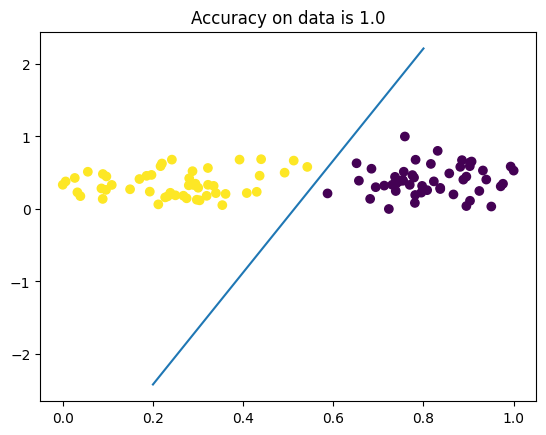

In [52]:
from sklearn.preprocessing import MinMaxScaler

chosen_lr = 0.1 # Add here
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

y_train = np.where(y_train == 0, -1, 1) # convert the label to match the plot code
w = perceptron(X_train, y_train, chosen_lr)

w, b = w[:-1], w[-1]
plot(X_train, y_train, w, b)

Print the test accuracy

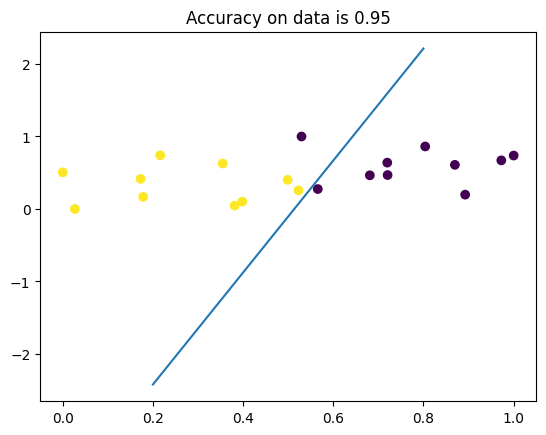

In [53]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

y_test = np.where(y_test == 0, -1, 1) # convert the label to match the plot code
preds = np.sign(np.dot(X_test, w) + b)
acc = np.count_nonzero(y_test == preds) / len(y_test)
plot(X_test, y_test, w, b)

Time for some convergence theory! </br>

Let ${\{x_i\} }_{i=1}^n$ be the training set and $R$ such that $∀i:‖x_i ‖≤R$.<br/>
Now, let $γ$ such that $∀i:x_i\cdot g(x_i)>\gamma$.<br/>
Then, the number of iterations required for convergence is bounded (from above) by $R^2/\gamma^2$. However, this is true only when using single batch method.

Use this theorem to find the the value of upper bound for our problem and use that exact number as upper bound. Report the train accuracy.
Did the iterations number improve?<br/>
<font color='red'>Write here your answer

in our case the number of iterations very small, so it did not change
</font>


In [54]:
def perceptron_updated(data, labels, lr = 1):
    # Implement here
    R = np.max(np.linalg.norm(data, axis=1))
    w = perceptron(data, labels,lr)
    w, b = w[:-1], w[-1]
    margins = labels * (np.dot(data, w) + b)
    gamma_values = margins / np.linalg.norm(w)
    gamma = np.min(gamma_values)
    bias = np.ones((data.shape[0], 1))
    data = np.concatenate((data,bias), axis=1)
    weights = np.ones(data.shape[1])
    max_iterations = (R**2)/(gamma**2)

    for itr in range(int(max_iterations)):
        misclassified = False
        for i in range(data.shape[0]):
            prediction = np.sign(np.dot(weights, data[i]))
            if prediction != labels[i]:
                weights += lr * labels[i] * data[i]
                misclassified = True
        if not misclassified:
            print(f'Converged after {itr+1} iterations')
            break
    return weights

Converged after 6 iterations
Converged after 6 iterations


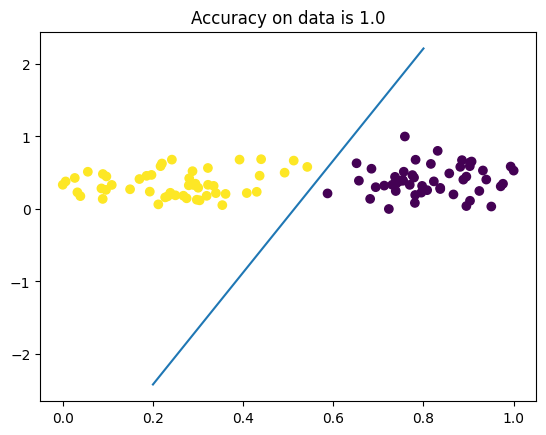

In [55]:
#Report the train accuracy.

chosen_lr = 0.1# Add here

 # convert the label to match the plot code
w = perceptron_updated(X_train, y_train, chosen_lr)
w, b = w[:-1], w[-1]
plot(X_train, y_train, w, b)

Report the test accuracy. Did it improve? What can you conclude about the perceptron algorithm in the linear separable case?

<font color='red'> 1.Convergence: The algorithm will find a solution that perfectly separates the training data.

 2.Finite Iterations: The number of iterations required is bounded and depends on the margin gamma and the maximum norm
 R of the data points.
 </font>

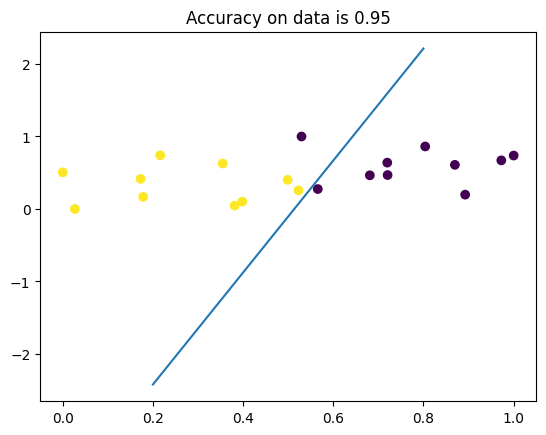

In [56]:
preds = np.sign(np.dot(X_test, w) + b)
acc = np.count_nonzero(y_test == preds) / len(y_test)
plot(X_test, y_test, w, b)

## Question 3 - SVM

You are given dataset for binary classification in 2D and aim to build the best SVM classifier.

import libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [58]:
#@title load npy file

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

load the data

In [59]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/svm_data_2d.npy')

# Access the data as needed
X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_val = data_dict['X_val']
y_val = data_dict['y_val']


Look at the plot of the training data. <br/>
What _geometric_ shape could (almost) perfectly separate the data?

parabola
<br/>

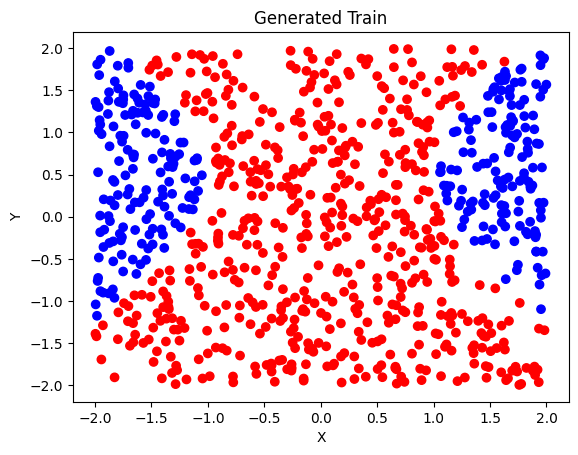

In [60]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

Hope you answered parabola! <br/>
Its equation is:
$$Ax^2+By^2+Cx+Dy+e=0$$
Based on that equation, construct a mapping function into 4d space, such that the problem will become a linear ($w^t ϕ(x)+e=0$). <br/>
After the mapping, learn a linear classifier and print the hyperplane equation.<br/>
Note: after getting an output, I would recommend you to plot this equation on desmos, just to "see it".

In [61]:
new_features =  np.column_stack((X_train[:, 0] ** 2, X_train[:, 1] ** 2, X_train[:, 0], X_train[:, 1])) # Implement here
model = SVC(kernel='linear', C=3)
model.fit(new_features, y_train)

# Get the hyperplane equation coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Print the hyperplane equation
equation_parts = []
for i in range(len(coefficients)):
    equation_parts.append(f"({coefficients[i]:.3f} * X{i+1})")
equation = " + ".join(equation_parts) + f" + ({intercept[0]:.3f})"

print("Hyperplane equation:")
print(f"  {equation}")

Hyperplane equation:
  (-5.180 * X1) + (5.054 * X2) + (0.045 * X3) + (-5.003 * X4) + (6.359)


Complete the missing lines to get plots on train and test

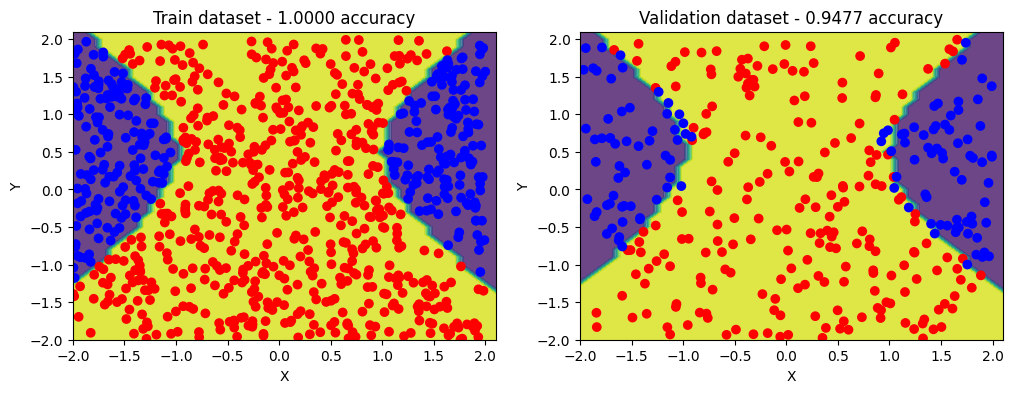

In [62]:
train_features = np.column_stack((X_train[:, 0] ** 2, X_train[:, 1] ** 2, X_train[:, 0], X_train[:, 1]))
train_preds = model.predict(train_features)
train_acc = np.mean(train_preds == y_train)

val_features = np.column_stack((X_val[:, 0] ** 2, X_val[:, 1] ** 2, X_val[:, 0], X_val[:, 1]))
val_preds = model.predict(val_features)
val_acc = np.mean(val_preds == y_val)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
data = np.c_[xx.ravel(), yy.ravel()]

new_features = np.column_stack((data[:, 0] ** 2, data[:, 1] ** 2, data[:, 0], data[:, 1]))
Z = model.predict(new_features)
Z = Z.reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, Z, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {train_acc:.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, Z, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {val_acc:.4f} accuracy')

plt.show()

You will try also two other kernels:
  - kernel='poly', degree=4, C=3.
  -	kernel='rbf', gamma=1.5, C=3.

Based on those two models, along with the parabola, which model generalizes the best? <br/>
<font color='red'>Write here your answer and explain it

The model using the parabola is the best. This is because the parabola, representing a linear model, exhibits higher validation accuracy compared to the non-linear models (RBF and polynomial kernels). Since our dataset has an parabola shape, a linear model is more appropriate for capturing the underlying patterns, resulting in better generalization performance.
</font>

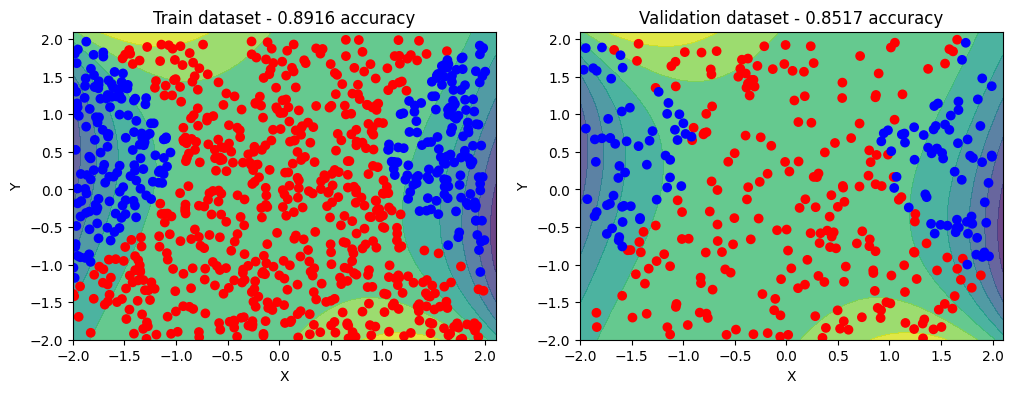

In [63]:
from sklearn.svm import SVC

model = SVC(kernel='poly', C=3,degree=4)# Implement here
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

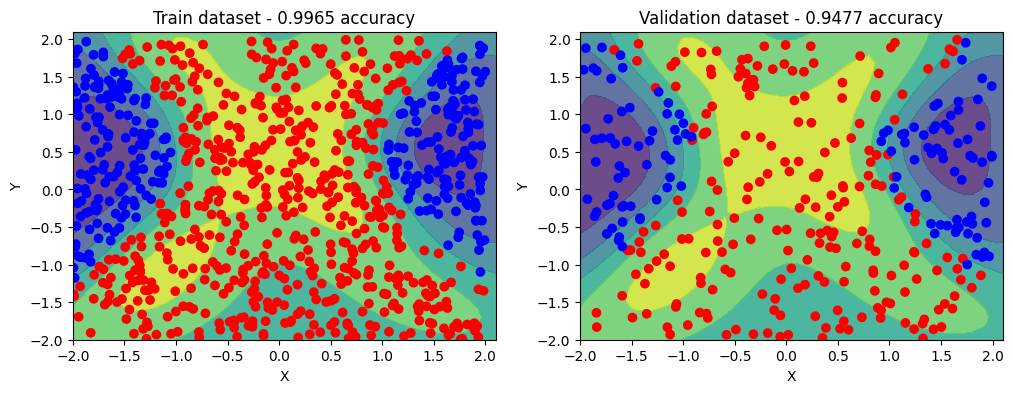

In [64]:
from sklearn.svm import SVC

model =  SVC(kernel='rbf', C=3,gamma = 1.5)# Implement here
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

Use the validation dataset to tune better hyperparameter for rbf (gamma). Use C=3 as before.

0.9505813953488372
2.1


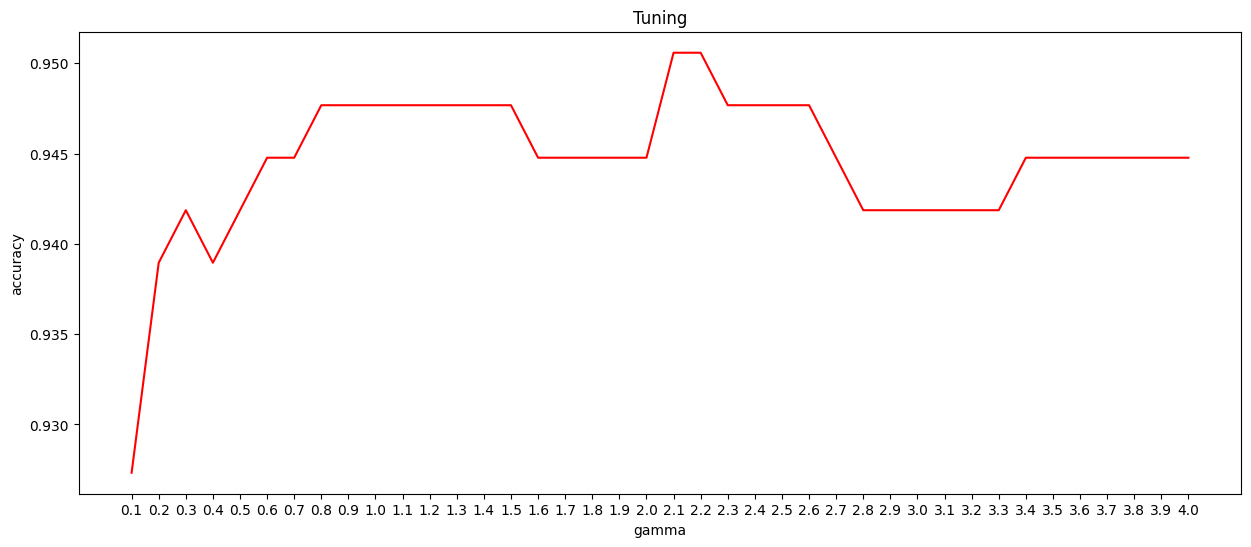

In [65]:
gammas = np.arange(0.1, 4.1, 0.1)
accs = []
max_accs = 0
max_gamma = 0

for gamma in gammas:
    # Implement here
    model =  SVC(kernel='rbf', C=3,gamma = gamma)
    clf = model.fit(X_train, y_train)
    temp = clf.score(X_val, y_val)
    accs.append(temp)
    if temp > max_accs:
        max_accs = temp
        max_gamma = gamma
print(max_accs)
print(max_gamma)
plt.figure(figsize=(15,6))
plt.plot(gammas, accs, color='red')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Tuning')
plt.xticks(gammas)
plt.show()

Questions:
- Without coding, only from the plot, will the accuracy change using the best $\gamma$ you found? Why?
- Why did we use C=3? <br/>
- Did you answer to best ml generalizer changed?

<font color='red'>Write here your answers and explain it
1. if we use the best gamma found from the plot, the accuracy on the validation set should be at its highest value observed during the tuning process. This is because we have already tested various values of gamma
and recorded their corresponding accuracies.
2.the c parameter in svm control the trade-off between achieving a low training error and a low testing error, using c = 3 provides a good balance for the given database .
3.From the plot, we see that using the best gamma results in an accuracy of over 0.95, which is higher than what we achieve with the linear kernel
</font>

## Question 4 - 10 pts Bonus
See attached PDF in Moodle